# Proyecto Segundo bimestre

## Kevin Mendoza

### El presente proyecto de analisis de datos con python trata sobre lo siguiente.
### Se obtuvo un archivo csv que contiene datos sobre jugadores de futbol de todo
### el mundo, el archivo csv se obtuvo realizando Scrapy a un link de descarga de 
### jugadores de la fifa. Los datos originales tenian muchas caracteristicas de
### los jugadores y para este proyecto se escogio las principales caracteristcas
### como son:

### full_name
### age
### height_cm
### weight_kgs
### positions
### positions
### potential
### value_euro
### finishing
### short_passing
### dribbling
### freekick_accuracy
### long_passing
### ball_control
### acceleration
### sprint_speed
### agility

### Estas caracteristicas se escogieron por ser las mas importantes para realizar
### un buen analisis.


### Para realizar este proyecto se usaran las siguientes librerías.

In [1]:
import pandas as pd
import numpy as np
import os
import sqlite3
import matplotlib.pyplot as plt


### El archivo csv se encuentra en la siguiente direccion, este se lo guardara
### en el siguiente path.

In [2]:
path = "C://Users//kevme//Documents//GitHub//py-Mendoza-Puertas-Patricio-Kevin//Proyecto 2B//proyecto2B//proyecto2B//spiders//fifa.csv"

### Al dataframe de prueba se lo usara de la siguiente manera.

In [3]:
df_prueba = pd.read_csv(path,  encoding = 'unicode_escape',sep = ";")

### Para continuar se guardara en un pickle, con la siguiente configuracion.

In [4]:
path_guardado_pickle = "C://Users//kevme//Documents//GitHub//py-Mendoza-Puertas-Patricio-Kevin//Proyecto 2B//proyecto2B//proyecto2B//spiders//fifa.pickle"

In [5]:
df_prueba.to_pickle(path_guardado_pickle)

df_pickle = pd.read_pickle(path_guardado_pickle)

### El archivo original se tienen mas de 15000 jugadores, para este proyecto se usaran
### solo los primeros 200. 

In [6]:
df = df_pickle.iloc[1:200,:].copy()

### y para finalizar y poder realizar el analisis se creara el xlsx del proyecto.

In [7]:
df.to_excel('C://Users//kevme//Documents//GitHub//py-Mendoza-Puertas-Patricio-Kevin//Proyecto 2B//proyecto2B//proyecto2B//spiders//mi_proyecto.xlsx')

### Para poder ver lo que contiene nuestro dataframe y poder continuar con el
### analisis, usaremos la siguiente linea.

In [8]:
df.head()

,full_name,age,height_cm,weight_kgs,positions,nationality,potential,value_euro,finishing,short_passing,dribbling,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility
1,Christian Dannemann Eriksen,27,154.94,76.2,"CAM,RM,CM",Denmark,89,69500000.0,81,91,84,87,89,91,76,73,80
2,Paul Pogba,25,190.50,83.9,"CM,CAM",France,91,73000000.0,75,86,87,82,90,90,71,79,76
3,Lorenzo Insigne,27,162.56,59.0,"LW,ST",Italy,88,62000000.0,77,85,90,77,78,93,94,86,94
4,Kalidou Koulibaly,27,187.96,88.9,CB,Senegal,91,60000000.0,22,68,69,28,60,63,70,75,50
5,Virgil van Dijk,27,193.04,92.1,CB,Netherlands,90,59500000.0,52,79,70,70,81,76,74,77,61


In [9]:
df

,full_name,age,height_cm,weight_kgs,positions,nationality,potential,value_euro,finishing,short_passing,dribbling,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility
1,Christian Dannemann Eriksen,27,154.94,76.2,"CAM,RM,CM",Denmark,89,69500000.0,81,91,84,87,89,91,76,73,80
2,Paul Pogba,25,190.50,83.9,"CM,CAM",France,91,73000000.0,75,86,87,82,90,90,71,79,76
3,Lorenzo Insigne,27,162.56,59.0,"LW,ST",Italy,88,62000000.0,77,85,90,77,78,93,94,86,94
4,Kalidou Koulibaly,27,187.96,88.9,CB,Senegal,91,60000000.0,22,68,69,28,60,63,70,75,50
5,Virgil van Dijk,27,193.04,92.1,CB,Netherlands,90,59500000.0,52,79,70,70,81,76,74,77,61
6,Kylian MbappÃ©,20,152.40,73.0,"RW,ST,RM",France,95,81000000.0,88,82,90,63,73,91,96,96,92
7,Sergio Leonel AgÃ¼ero del Castillo,30,172.72,69.9,ST,Argentina,89,64500000.0,93,81,89,73,64,89,88,80,86
8,Manuel Neuer,32,193.04,92.1,GK,Germany,89,38000000.0,13,55,30,11,59,46,54,60,51
9,Edinson Roberto Cavani GÃ³mez,32,185.42,77.1,ST,Uruguay,89,60000000.0,89,78,80,76,52,82,75,76,77
10,Sergio Busquets i Burgos,30,187.96,76.2,"CDM,CM",Spain,89,51500000.0,67,89,80,68,82,88,50,52,66


### Para poder observar en una tabla varios ejemplos se lo realiza de la 
### siguiente manera; por ejemplo: jugadores de futbol de Brazil

In [10]:
a=df[df.nationality=='Brazil']
a

,full_name,age,height_cm,weight_kgs,positions,nationality,potential,value_euro,finishing,short_passing,dribbling,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility
17,Fernando Luiz Rosa,33,152.40,67.1,CDM,Brazil,87,20500000.0,69,85,77,72,83,82,68,67,72
22,Marcelo Vieira da Silva JÃºnior,30,175.26,79.8,LB,Brazil,87,36500000.0,73,84,90,67,78,92,83,82,86
30,Carlos Henrique Venancio Casimiro,27,185.42,83.9,CDM,Brazil,89,50500000.0,64,83,69,74,82,78,61,66,62
34,FÃ¡bio Henrique Tavares,25,187.96,78.0,CDM,Brazil,88,34000000.0,66,83,76,53,80,82,69,72,69
39,Alex Nicolao Telles,26,154.94,71.2,LB,Brazil,86,31000000.0,65,83,82,79,86,82,84,85,73
52,Felipe Augusto de Almeida Monteiro,29,190.50,86.2,CB,Brazil,84,22500000.0,39,74,57,30,67,62,60,67,52
60,Anderson Souza ConceiÃ§Ã£o,25,190.50,79.8,CAM,Brazil,87,34000000.0,80,81,82,87,79,84,77,76,76
68,Malcom Filipe Silva de Oliveira,22,172.72,73.9,RW,Brazil,89,31500000.0,75,80,85,81,73,85,87,82,92
74,Raphael William Anjos Rochedo,31,190.50,84.8,GK,Brazil,82,14000000.0,8,18,9,18,16,21,41,42,34
75,Juan Everton Mestres de Mesquita,35,154.94,82.1,"CB,CDM",Brazil,82,6500000.0,56,67,60,58,58,64,68,74,61


### Jugadores menores de 25 años

In [11]:
df[df.age < 25 ]

,full_name,age,height_cm,weight_kgs,positions,nationality,potential,value_euro,finishing,short_passing,dribbling,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility
6,Kylian MbappÃ©,20,152.40,73.0,"RW,ST,RM",France,95,81000000.0,88,82,90,63,73,91,96,96,92
16,Milan Å kriniar,24,187.96,79.8,CB,Slovakia,93,53500000.0,42,73,59,30,69,67,70,73,48
32,Kepa Arrizabalaga,24,185.42,84.8,GK,Spain,90,31000000.0,11,32,10,19,36,16,34,33,41
35,Anthony Martial,23,182.88,76.2,"LW,ST,LM",France,90,42500000.0,84,78,88,54,60,87,88,89,85
36,Timo Werner,23,154.94,74.8,ST,Germany,87,40000000.0,87,77,83,56,55,84,93,93,81
37,Niklas SÃ¼le,23,195.58,97.1,CB,Germany,90,36500000.0,20,78,42,30,63,63,52,84,33
38,Bruno Miguel Borges Fernandes,24,152.40,68.9,"CAM,CM",Portugal,88,40500000.0,74,85,83,85,84,86,79,76,77
40,JosÃ© MarÃ­a GimÃ©nez de Vargas,24,185.42,79.8,CB,Uruguay,88,34000000.0,37,68,47,44,58,56,69,70,56
42,Davinson SÃ¡nchez,22,187.96,78.9,CB,Colombia,88,34000000.0,40,77,63,27,67,73,72,79,60
43,Marco Asensio Willemsen,23,182.88,76.2,"LW,RW",Spain,89,41500000.0,80,83,85,76,81,85,85,82,79


## Graficos

### El siguiente grafico se puede observar la cantidad de jugadores en cada una
### de las posiciones

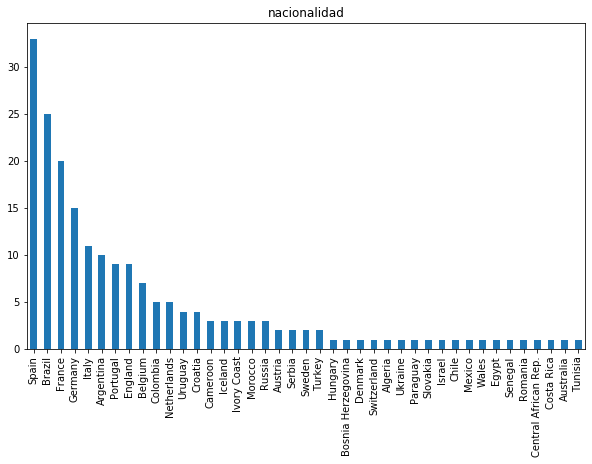

In [12]:
fig = plt.figure(figsize=(10,6))
df.nationality.value_counts().plot(kind='bar')
plt.title('nacionalidad')
plt.show()

### Potencial de los jugadores de Brazil

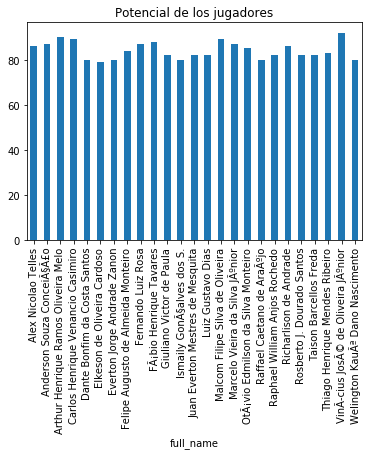

In [13]:
a.groupby('full_name').mean()["potential"].plot(kind='bar',stacked=True,
          title="Potencial de los jugadores")

### Jugadores con la mayor edad en cada pais.

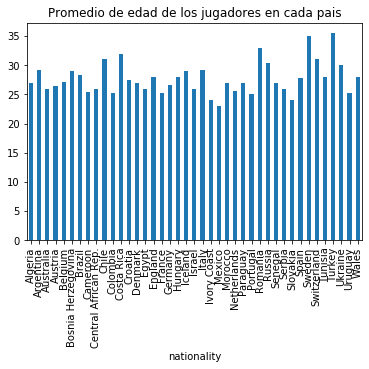

In [14]:
df.groupby('nationality').mean()["age"].plot(kind='bar',stacked=True,
          title="Promedio de edad de los jugadores en cada pais")

### Variacion del potencial en cada posicion.

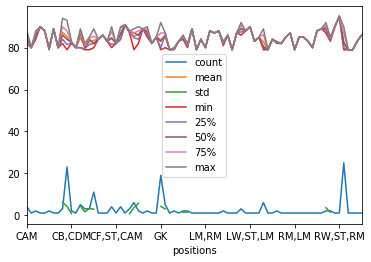

In [15]:
jugadores = df.groupby(['positions'])['potential'].describe()
jugadores.plot(kind='line')

### Potecial de los jugadores segun la edad.

Text(0.5, 0.98, 'Potencial de los jugadores segun la edad')

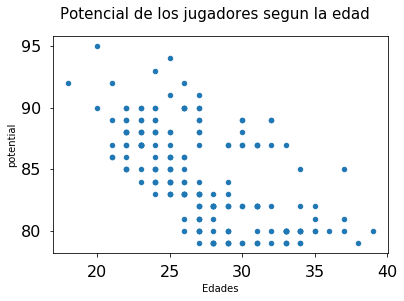

In [16]:
fig, ax1 = plt.subplots()
Potencial_edad = pd.read_excel('C://Users//kevme//Documents//GitHub//py-Mendoza-Puertas-Patricio-Kevin//Proyecto 2B//proyecto2B//proyecto2B//spiders//mi_proyecto.xlsx')
my_plot = df.plot("age", "potential", kind="scatter", ax=ax1)
ax1.set_xlabel("Edades")
ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Potencial de los jugadores segun la edad', fontsize=15)

### Porcentaje de jugadores por pais.

Text(0, 0.5, '')

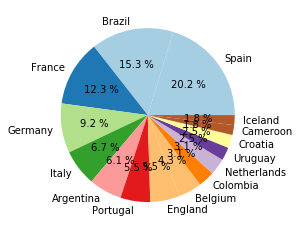

In [17]:
df['nationality'].value_counts().head(15).plot(kind = 'pie', cmap = 'Paired', autopct="%0.1f %% ")
plt.ylabel('')

### Potencial de los jugadores de Francia en cuanto a goles.

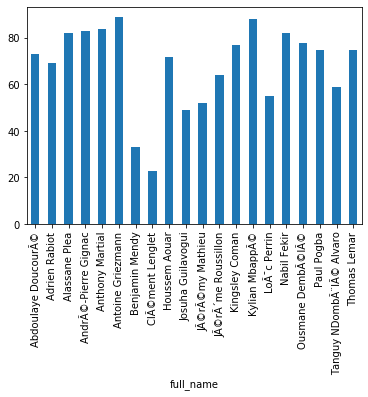

In [18]:
b=df[df.nationality=='France']
b
b.groupby('full_name').mean()["finishing"].plot(kind='bar',stacked=True)

### Porcentaje de jugadores por posicion en el campo.

Text(0, 0.5, '')

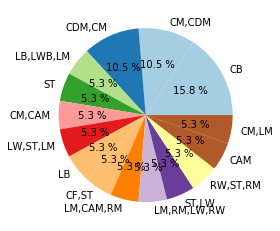

In [19]:
b['positions'].value_counts().head(15).plot(kind = 'pie', cmap = 'Paired', autopct="%0.1f %% ")
plt.ylabel('')

### Potencial de los jugadores de Inglaterra en cuanto a control de balon.

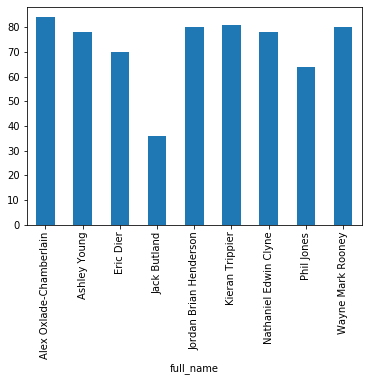

In [20]:
c=df[df.nationality=='England']
c
c.groupby('full_name').mean()["ball_control"].plot(kind='bar',stacked=True)

### Edad de los jugaores de Inglaterra. 

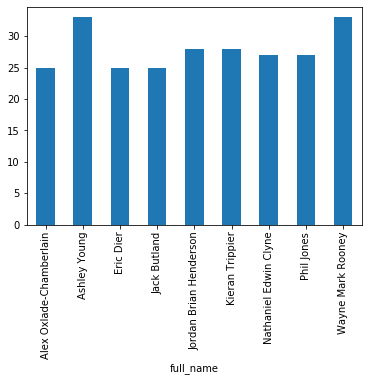

In [21]:
c.groupby('full_name').mean()["age"].plot(kind='bar',stacked=True)

## Conclusiones

## 1) Como se pudo observar en la practica python es una herramienta muy poderosa
## que nos ayuda en el analisis de datos.

## 2) Python nos permite separar los datos si un archivo es muy grande de la
## siguiente manera df = df_pickle.iloc[1:200,:].copy() para que de esta forma
## sea mas facil el trabajo.

## 3) Los graficos que nos ofrece python nos ayuda a visualizar de una manera mas 
## dinamica los datos que se tengan en los archivos.
